# GWAS in the Microsoft Azure Cloud
We adapted the NIH CFDE tutorial from [here](https://training.nih-cfde.org/en/latest/Bioinformatic-Analyses/GWAS-in-the-cloud/background/) and fit it to a notebook. We have greatly simplified the instructions, so if you need or want more details, look at the full tutorial to find out more.
Most of this notebook is bash, but expects that you are using a Python kernel, until step 3, plotting, you will need to switch your kernel to R.

## 1. Setup
### Download the data
use %%bash to denote a bash block. You can also use '!' to denote a single bash command within a Python notebook

In [ ]:
mkdir GWAS

In [2]:
!curl -LO https://de.cyverse.org/dl/d/E0A502CC-F806-4857-9C3A-BAEAA0CCC694/pruned_coatColor_maf_geno.vcf.gz /


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.3M  100 11.3M    0     0  3742k      0  0:00:03  0:00:03 --:--:-- 3742k
curl: (3) URL using bad/illegal format or missing URL


In [4]:
!curl -LO https://de.cyverse.org/dl/d/3B5C1853-C092-488C-8C2F-CE6E8526E96B/coatColor.pheno

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1221  100  1221    0     0    869      0  0:00:01  0:00:01 --:--:--   870


In [5]:
%%bash
mv *.gz GWAS
mv *.pheno GWAS
ls GWAS

coatColor.pheno
pruned_coatColor_maf_geno.vcf.gz


### Install dependencies
Here we install mamba, which is faster than conda, but it can be tricky to add to path in a Sagemaker notebook so we just call the whole path. You could also skip this install and just use conda since that is preinstalled in the kernel.

In [6]:
%%bash
curl -L -O https://github.com/conda-forge/miniforge/releases/latest/download/Mambaforge-$(uname)-$(uname -m).sh
bash Mambaforge-$(uname)-$(uname -m).sh -b -p $HOME/mambaforge

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 90.5M  100 90.5M    0     0   100M      0 --:--:-- --:--:-- --:--:--  225M


PREFIX=/home/azureuser/mambaforge
Unpacking payload ...
Extracting python-3.10.6-h582c2e5_0_cpython.tar.bz2
Extracting _libgcc_mutex-0.1-conda_forge.tar.bz2
Extracting ca-certificates-2022.6.15-ha878542_0.tar.bz2
Extracting ld_impl_linux-64-2.36.1-hea4e1c9_2.tar.bz2
Extracting libstdcxx-ng-12.1.0-ha89aaad_16.tar.bz2
Extracting pybind11-abi-4-hd8ed1ab_3.tar.bz2
Extracting tzdata-2022c-h191b570_0.tar.bz2
Extracting libgomp-12.1.0-h8d9b700_16.tar.bz2
Extracting _openmp_mutex-4.5-2_gnu.tar.bz2
Extracting libgcc-ng-12.1.0-h8d9b700_16.tar.bz2
Extracting bzip2-1.0.8-h7f98852_4.tar.bz2
Extracting c-ares-1.18.1-h7f98852_0.tar.bz2
Extracting icu-70.1-h27087fc_0.tar.bz2
Extracting keyutils-1.6.1-h166bdaf_0.tar.bz2
Extracting libev-4.33-h516909a_1.tar.bz2
Extracting libffi-3.4.2-h7f98852_5.tar.bz2
Extracting libiconv-1.16-h516909a_0.tar.bz2
Extracting libnsl-2.0.0-h7f98852_0.tar.bz2
Extracting libuuid-2.32.1-h7f98852_1000.tar.bz2
Extracting libzlib-1.2.12-h166bdaf_2.tar.bz2
Extracting lz4-c-1.9.3-

In [ ]:
!../mambaforge/bin/mamba install -y -c bioconda plink vcftools

## 2. Analyze

### Make map and ped files from the vcf file to feed into plink

In [ ]:
!cd GWAS
!pwd

## Install vcftools

In [15]:
!git clone https://github.com/vcftools/vcftools.git

Cloning into 'vcftools'...
remote: Enumerating objects: 651, done.
remote: Total 651 (delta 0), reused 0 (delta 0), pack-reused 651
Receiving objects: 100% (651/651), 783.57 KiB | 496.00 KiB/s, done.
Resolving deltas: 100% (316/316), done.
Updating files: 100% (128/128), done.


In [ ]:
cd vcftools

In [23]:
!bash autogen.sh

configure.ac:16: installing './compile'
configure.ac:12: installing './install-sh'
configure.ac:12: installing './missing'
src/cpp/Makefile.am: installing './depcomp'


In [28]:
!bash configure

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... gawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking whether make supports the include directive... yes (GNU style)
checking dependency style of g++... gcc3
checking for gcc... gcc
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checkin

In [ ]:
!make

In [ ]:
!sudo make install

In [39]:
!vcftools --gzvcf pruned_coatColor_maf_geno.vcf.gz --plink --out coatColor


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf pruned_coatColor_maf_geno.vcf.gz
	--out coatColor
	--plink

Using zlib version: 1.2.11
After filtering, kept 53 out of 53 Individuals
Writing PLINK PED and MAP files ... 
Done.
After filtering, kept 476840 out of a possible 476840 Sites
Run Time = 9.00 seconds


### Create a list of minor alleles, for more info on these terms, look at step 2 at https://training.nih-cfde.org/en/latest/Bioinformatic-Analyses/GWAS-in-the-cloud/analyze/

In [40]:
#unzip vcf
!vcftools --gzvcf pruned_coatColor_maf_geno.vcf.gz --recode --out pruned_coatColor_maf_geno


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf pruned_coatColor_maf_geno.vcf.gz
	--out pruned_coatColor_maf_geno
	--recode

Using zlib version: 1.2.11
After filtering, kept 53 out of 53 Individuals
Outputting VCF file...
After filtering, kept 476840 out of a possible 476840 Sites
Run Time = 12.00 seconds


In [41]:
#create list of minor alleles
!cat pruned_coatColor_maf_geno.recode.vcf | awk 'BEGIN{FS="\t";OFS="\t";}/#/{next;}{{if($3==".")$3=$1":"$2;}print $3,$5;}'  > minor_alleles

In [42]:
!head minor_alleles

BICF2P1489653	T
chr1:11368	T
BICF2G630707787	T
chr1:22137	A
chr1:22143	A
chr1:23623	G
chr1:23651	C
chr1:23653	T
BICF2S23441188	A
chr1:30122	T


### Run quality controls

#### Download Plink

In [44]:
!wget https://zzz.bwh.harvard.edu/plink/dist/plink-1.07-x86_64.zip

--2022-10-25 02:20:06--  https://zzz.bwh.harvard.edu/plink/dist/plink-1.07-x86_64.zip
Resolving zzz.bwh.harvard.edu (zzz.bwh.harvard.edu)... 170.223.191.141
Connecting to zzz.bwh.harvard.edu (zzz.bwh.harvard.edu)|170.223.191.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3971138 (3.8M) [application/zip]
Saving to: ‘plink-1.07-x86_64.zip’

plink-1.07-x86_64.z 100%[===================>]   3.79M  20.2MB/s    in 0.2s    

2022-10-25 02:20:08 (20.2 MB/s) - ‘plink-1.07-x86_64.zip’ saved [3971138/3971138]



In [46]:
!unzip plink-1.07-x86_64.zip

Archive:  plink-1.07-x86_64.zip
   creating: plink-1.07-x86_64/
  inflating: plink-1.07-x86_64/plink  
  inflating: plink-1.07-x86_64/COPYING.txt  
  inflating: plink-1.07-x86_64/test.map  
  inflating: plink-1.07-x86_64/test.ped  
  inflating: plink-1.07-x86_64/gPLINK.jar  
  inflating: plink-1.07-x86_64/README.txt  


In [ ]:
cd GWAS

In [12]:
#calculate missingness per locus
!./plink-1.07-x86_64/plink --file coatColor --make-pheno coatColor.pheno "yellow" --missing --out miss_stat --noweb --dog --reference-allele minor_alleles --allow-no-sex --adjust


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Skipping web check... [ --noweb ] 
Writing this text to log file [ miss_stat.log ]
Analysis started: Tue Nov 29 17:46:18 2022

Options in effect:
	--file coatColor
	--make-pheno coatColor.pheno yellow
	--missing
	--out miss_stat
	--noweb
	--dog
	--reference-allele minor_alleles
	--allow-no-sex
	--adjust

476840 (of 476840) markers to be included from [ coatColor.map ]
Warning, found 53 individuals with ambiguous sex codes
Writing list of these individuals to [ miss_stat.nosex ]
53 individuals read from [ 

In [52]:
#take a look at lmiss, which is the per locus rates of missingness
!head miss_stat.lmiss

 CHR                                    SNP   N_MISS   N_GENO   F_MISS
   1                          BICF2P1489653        1       53  0.01887
   1                             chr1:11368        0       53        0
   1                        BICF2G630707787        0       53        0
   1                             chr1:22137        0       53        0
   1                             chr1:22143        0       53        0
   1                             chr1:23623        0       53        0
   1                             chr1:23651        2       53  0.03774
   1                             chr1:23653        2       53  0.03774
   1                         BICF2S23441188        1       53  0.01887


In [53]:
#peek at imiss which is the individual rates of missingness
!head miss_stat.imiss

      FID       IID MISS_PHENO   N_MISS   N_GENO   F_MISS
  dark_13   dark_13          N     4994   476840  0.01047
  dark_23   dark_23          N     4478   476840 0.009391
  dark_21   dark_21          N     4739   476840 0.009938
 yellow_5  yellow_5          N    15094   476840  0.03165
 yellow_6  yellow_6          N    13889   476840  0.02913
   dark_1    dark_1          N     5703   476840  0.01196
   dark_7    dark_7          N     4895   476840  0.01027
   dark_9    dark_9          N    23771   476840  0.04985
   dark_2    dark_2          N    33736   476840  0.07075


### Convert to plink binary format

In [54]:
!./plink-1.07-x86_64/plink --file coatColor --allow-no-sex --dog --make-bed --noweb --out coatColor.binary


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Skipping web check... [ --noweb ] 
Writing this text to log file [ coatColor.binary.log ]
Analysis started: Tue Oct 25 02:21:52 2022

Options in effect:
	--file coatColor
	--allow-no-sex
	--dog
	--make-bed
	--noweb
	--out coatColor.binary

** For gPLINK compatibility, do not use '.' in --out **
476840 (of 476840) markers to be included from [ coatColor.map ]
Warning, found 53 individuals with ambiguous sex codes
Writing list of these individuals to [ coatColor.binary.nosex ]
53 individuals read from [ coa

### Run a simple association step (the GWAS part!)

In [55]:
!./plink-1.07-x86_64/plink --bfile coatColor.binary --make-pheno coatColor.pheno "yellow" --assoc --reference-allele minor_alleles --allow-no-sex --adjust --dog --noweb --out coatColor


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Skipping web check... [ --noweb ] 
Writing this text to log file [ coatColor.log ]
Analysis started: Tue Oct 25 02:22:06 2022

Options in effect:
	--bfile coatColor.binary
	--make-pheno coatColor.pheno yellow
	--assoc
	--reference-allele minor_alleles
	--allow-no-sex
	--adjust
	--dog
	--noweb
	--out coatColor

Reading map (extended format) from [ coatColor.binary.bim ] 
476840 markers to be included from [ coatColor.binary.bim ]
Reading pedigree information from [ coatColor.binary.fam ] 
53 individuals re

### Identify statistical cutoffs
This code finds the equivalent of 0.05 and 0.01 p value in the negative-log-transformed p values file. We will use these cutoffs to draw horizontal lines in the Manhattan plot for visualization of haplotypes that cross the 0.05 and 0.01 statistical threshold (i.e. have a statistically significant association with yellow coat color)

In [13]:
%%bash
unad_cutoff_sug=$(tail -n+2 coatColor.assoc.adjusted | awk '$10>=0.05' | head -n1 | awk '{print $3}')
unad_cutoff_conf=$(tail -n+2 coatColor.assoc.adjusted | awk '$10>=0.01' | head -n1 | awk '{print $3}')

## 3. Plotting
In this tutorial, plotting is done in R, so at this point you can change your kernel to R in the top right. Wait for it to say 'idle' in the bottom left, then continue. You could also plot using Python native packages and maintain the Python notebook kernel.

### Install qqman

## Please select R Kernel from 'Top right Corner' and install "qqman" R package from your terminal

In [ ]:
!install.packages("qqman")

### Run the plotting function

In [1]:
#make sure you are still CD in GWAS, when you change kernel it may reset to home
setwd('GWAS')

In [ ]:
install.packages("qqman")

In [7]:
data=read.table("coatColor.assoc", header=TRUE)

In [8]:
data=data[!is.na(data$P),]

In [9]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





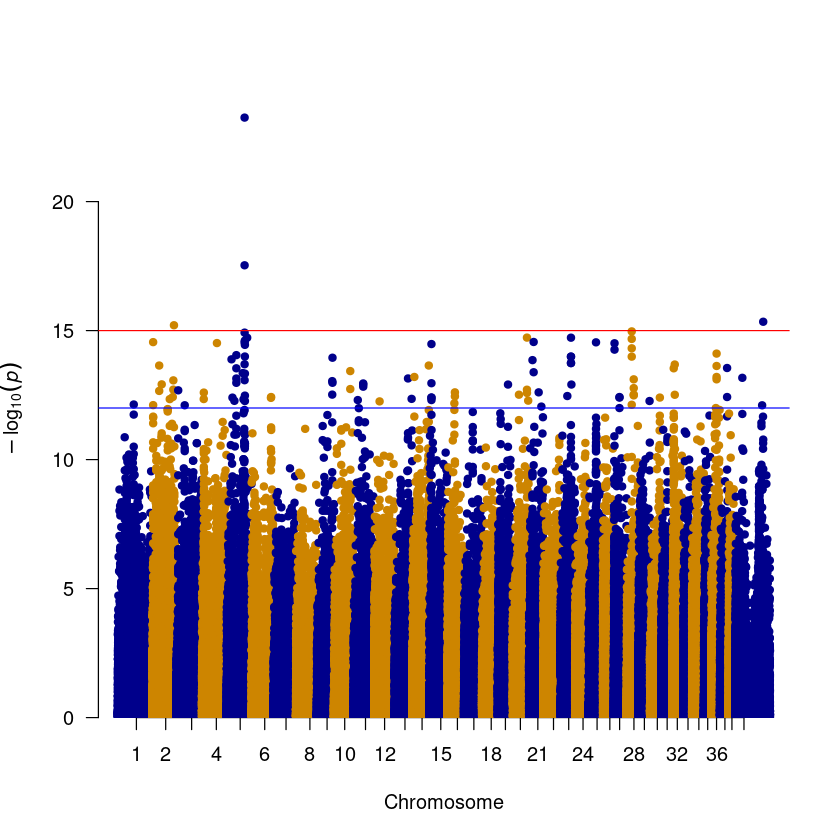

In [10]:
manhattan(data, p = "P", col = c("blue4", "orange3"),
          suggestiveline = 12,
          genomewideline = 15,
          chrlabs = c(1:38, "X"), annotateTop=TRUE, cex = 1.2)

In our graph, haplotypes in four parts of the genome (chromosome 2, 5, 28 and X) are found to be associated with an increased occurrence of the yellow coat color phenotype.

The top associated mutation is a nonsense SNP in the gene MC1R known to control pigment production. The MC1R allele encoding yellow coat color contains a single base change (from C to T) at the 916th nucleotide.